<a href="https://colab.research.google.com/github/ani-anvesh/MLEngineerPrep/blob/main/ML_Engineer_Journey_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Block**

Train Linear Regression on Boston Housing Dataset

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


boston = fetch_california_housing()
X = boston.data      # Features
y = boston.target    # Target values (house prices)

# 2. Normalize features (optional but helps with numerical stability)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 3. Add bias term (column of ones) to X
m = X.shape[0]
print(m)

X_b = np.c_[np.ones((m, 1)), X]  # shape = (m, n+1)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# 5. Implement Normal Equation: θ = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# 6. Make predictions on test set
y_pred = X_test.dot(theta_best)

# 7. Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

20640
Mean Squared Error: 0.5558915986952444


In [ ]:
# adding L2 Regularization manually
# 8. Manually add L2 regularization
lambda_reg = 1.0
l2_penalty = np.sum(theta_best[1:]**2)  # exclude bias term
loss_with_l2 = mse + lambda_reg * l2_penalty

print("MSE without regularization:", mse)
print("Loss with manual L2 regularization:", loss_with_l2)

MSE without regularization: 0.5558915986952444
Loss with manual L2 regularization: 3.0885929389783806


In [ ]:
# 2. Lambda candidates to try
from sklearn.model_selection import KFold

lambda_values = [0.01, 0.1, 1, 10, 100]

# 3. Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = {}

for lambda_reg in lambda_values:
    total_loss = 0

    for train_index, val_index in kf.split(X_b):
        X_train, X_val = X_b[train_index], X_b[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Normal equation (no regularization)
        theta = np.linalg.inv(X_train.T @ X_train).dot(X_train.T).dot(y_train)

        # Predictions and MSE
        y_pred = X_val.dot(theta)
        mse = mean_squared_error(y_val, y_pred)

        # Manually add L2 regularization (excluding bias)
        l2_penalty = np.sum(theta[1:] ** 2)
        total_loss += mse + lambda_reg * l2_penalty

    avg_loss = total_loss / 10
    results[lambda_reg] = avg_loss
    print(f"Lambda: {lambda_reg}, Avg Regularized Loss: {avg_loss:.4f}")

# 4. Best lambda
best_lambda = min(results, key=results.get)
print("\nBest Lambda:", best_lambda)


Lambda: 0.01, Avg Regularized Loss: 0.5569
Lambda: 0.1, Avg Regularized Loss: 0.7765
Lambda: 1, Avg Regularized Loss: 2.9721
Lambda: 10, Avg Regularized Loss: 24.9285
Lambda: 100, Avg Regularized Loss: 244.4925

Best Lambda: 0.01


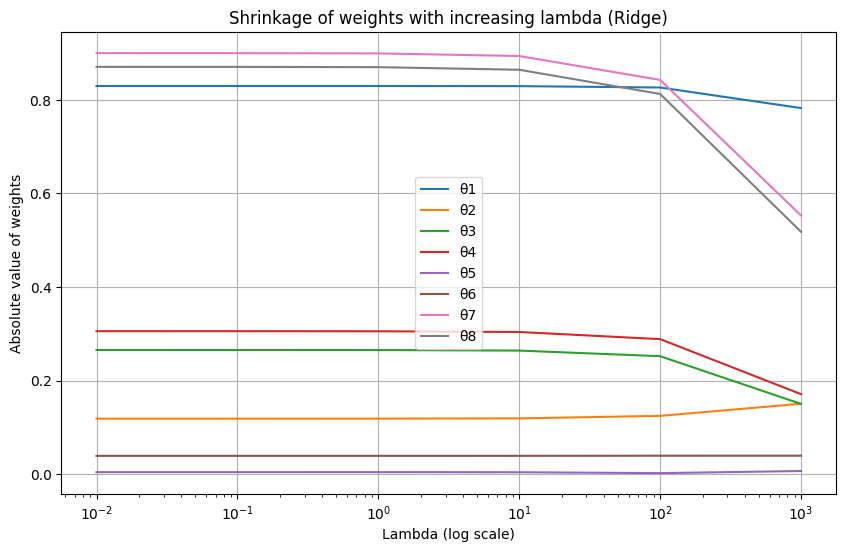

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load and normalize data
data = fetch_california_housing()
X = data.data
y = data.target
X = (X - X.mean(axis=0)) / X.std(axis=0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

# Lambda values
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]
theta_history = []

# Compute weights for each lambda
for lambda_reg in lambda_values:
    # Compute theta using normal equation (with regularization)
    # Regularization matrix (don't regularize the bias term)
    n = X_b.shape[1]
    L2_matrix = np.eye(n)
    L2_matrix[0, 0] = 0  # Don't penalize bias term

    theta_ridge = np.linalg.inv(X_b.T @ X_b + lambda_reg * L2_matrix) @ X_b.T @ y
    theta_history.append(theta_ridge)

# Convert list to array
theta_history = np.array(theta_history)

# Plot shrinkage of weights (excluding bias term)
plt.figure(figsize=(10, 6))
for i in range(1, theta_history.shape[1]):  # Skip bias term
    plt.plot(lambda_values, np.abs(theta_history[:, i]), label=f'θ{i}')

plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Absolute value of weights')
plt.title('Shrinkage of weights with increasing lambda (Ridge)')
plt.legend()
plt.grid(True)
plt.show()


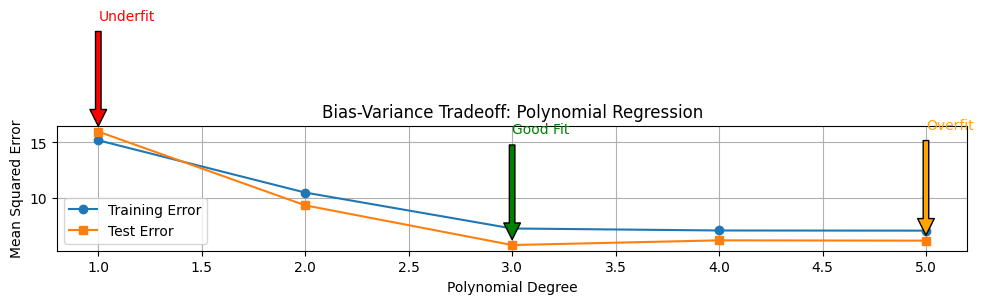

In [1]:
# Re-import required packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3  # X in range [-3, 3]
y = 0.5 * X**3 - X**2 + X + np.random.randn(100, 1) * 3  # Cubic relationship + noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Track errors for each degree
train_errors = []
test_errors = []

degrees = range(1, 6)

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and compute MSE
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot training vs test error
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff: Polynomial Regression")
plt.legend()
plt.grid(True)

# Annotate underfit, good fit, overfit
plt.annotate("Underfit", xy=(1, test_errors[0]), xytext=(1, test_errors[0]+10),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
plt.annotate("Good Fit", xy=(3, test_errors[2]), xytext=(3, test_errors[2]+10),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')
plt.annotate("Overfit", xy=(5, test_errors[-1]), xytext=(5, test_errors[-1]+10),
             arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=10, color='orange')

plt.tight_layout()
plt.show()


# **DSA BLOCK**

In [ ]:
# Move Zeros


def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """
        zeros=[]
        numbers=[]
        for i in range(0,len(nums)):
            if nums[i] == 0:
                zeros.append(nums[i])
            else:
                numbers.append(nums[i])
        del nums[:]
        nums.extend(numbers + zeros)


def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """

        nonZeroIndex=0
        for i in range(0,len(nums)):
            if nums[i] != 0:
                nums[nonZeroIndex] = nums[i]
                nonZeroIndex += 1

        for i in range(nonZeroIndex,len(nums)):
            nums[i] = 0

In [ ]:
# Find the best day to sell stocks

def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """

        buy = min(prices)
        del prices[:prices.index(buy)]
        sell = max(prices)

        return sell-buy


def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """

        min_price = float('inf')
        max_profit = 0

        for i in prices:
            if i < min_price:
                min_price = i
            else:
                profit = i - min_price
                max_profit = max(max_profit, profit)


        return max_profit